<br>
<br> <center> <font size="7" color=Orange>Churn Prediction</font> </center> <br/>

<br>
<br> <center> <font size="7" color=Orange>Final Project Submission</font> </center> <br/>

<br>
<br> <font size="6" color=Blue>Abstract</font> <br/>
<br>

## A major issue with telecom companies today is the loss of a customers business to a competitor, or "churning". If accurately predicted and correctly analyzed, a plan to intervene can be implemented. 

<br>
<br> <font size="6" color=Blue>Problem Statement and Background</font> <br/>
<br>

### *The dataset chosen is a comprehensive collection of customer attributes in regard to a telecom company.
### * There arer different attributes like daily call time, night call time, daily recharge etc.
### * On the base of these attributes we are going to predict whether a customer will churn or not.

### Churn is a major problem for telecom companies due to the fact that it is more expensive to obtain a new customer than is it to keep an existing customer. This assignment is about enabling churn reduction using analytics.

<br>
<br> <font size="6" color=Blue>Dataset</font> <br/>
<br>

### * I have taken the classification dataset from Kaggle.
### * The dataset can be found at the following link: <a href="url">https://www.kaggle.com/c/customer-churn-prediction-2020/data</a>


# The Business Pain:
### Most telecom companies suffer from voluntary churn. Churn rate has strong impact on the life-time value of the customer because it affects the length of service and the lifetime customer value. For example, if a company has a 25% churn rate, the average customer lifetime is 4 years; similarly, a company with a churn rate of 50% has an average customer lifetime of 2 years. It is estimated that 75 percent of the 17 to 20 million subscribers signing up with a new wireless carrier every year are coming from another wireless provider, which means they are churners. Telecom companies spend on average, hundreds of dollars to acquire a new customer and when that customer leaves, the company loses not only the future revenue from that customer but also the resources spent to acquire that customer. The bottom line is that churn erodes profitability.

## Steps that have been adopted by telecom companies so far:
### Telecom companies have used two approaches to address churn - (a) Untargeted approach and (b) Targeted approach. The untargeted approach relies on superior product and mass advertising to increase brand loyalty and thus retain customers. The targeted approach relies on identifying customers who are likely to churn, and provide suitable intervention to encourage them to stay.

## Role of predictive modeling:
### In the targeted approach the company tries to identify in advance customers who are likely to churn. The company then targets those customers with special programs or incentives. This approach can bring in huge loss for a company, if churn predictions are inaccurate, because then firms are wasting incentive money on customers who would have stayed anyway.

## Basic approach?

### The ML Pipeline that I have followed is :
#### Importing the necessary libraries and the dataset
### Performing Data Preprocessing (Exploratory Data Analysis and Data Manipulation)
### Modelling using Logistic Regression, KNN and Random Forest
### Performing Prediction
### Visualization of combined errors

## Research Questions
## With how much accuracy can we predict wether a customer will churn or not?
## What are the main features that affect churn predictions the most?

<br>
<br> <font size="6" color=Blue>Data Cleaning</font> <br/>
<br>

## Reading the Data

<br>
<br> <center> <font size="4" color=Orange>Milestone 2: Exploratory Data Analysis (EDA)</font> </center> <br/>

In [ ]:
import os
path=os.path.normpath(os.getcwd() + os.sep + os.pardir)

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
train = pd.read_csv(path+'\\data\\train.csv')
train.head(5)

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

## Columns in the Dataset

In [ ]:
train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

## Checking if there is any Null value in any Column

In [ ]:
print("Null values per Column in Training Dataset:\n",train.isnull().sum(axis = 0))

Null values per Column in Training Dataset:
 state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


### There is no Null value in the Dataset

## Checking for Duplicates

In [ ]:
train[train.duplicated(keep=False)]

Empty DataFrame
Columns: [state, account_length, area_code, international_plan, voice_mail_plan, number_vmail_messages, total_day_minutes, total_day_calls, total_day_charge, total_eve_minutes, total_eve_calls, total_eve_charge, total_night_minutes, total_night_calls, total_night_charge, total_intl_minutes, total_intl_calls, total_intl_charge, number_customer_service_calls, churn]
Index: []

### There are no completely identical rows

## Datatype per Column

In [ ]:
train.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

## Are there categorical columns that should be numerical?

### * Yes there is a column named "churn" that should be numeric when used in the machine learning model

*italicized text*## Is the data in the first few rows consistent with the name of the feature?

### * Yes

## Are there lists or dictionaries packed into one feature?

### * No

## Are dates in the date data type?

### * No

<br>
<br> <font size="6" color=Blue>Visualizations</font> <br/>
<br>

## Box Plot to see Each Numeric Column Data Distribution

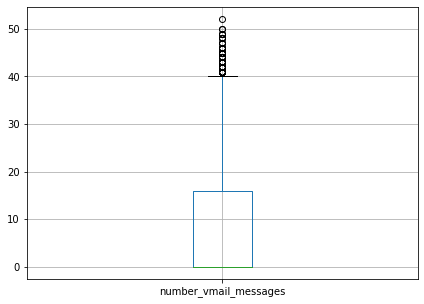

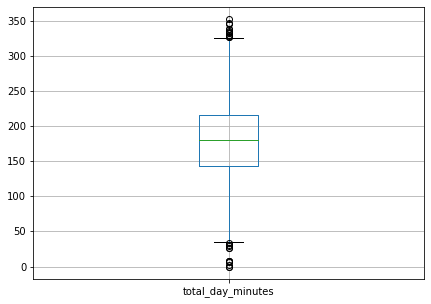

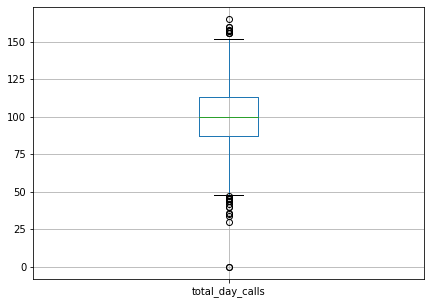

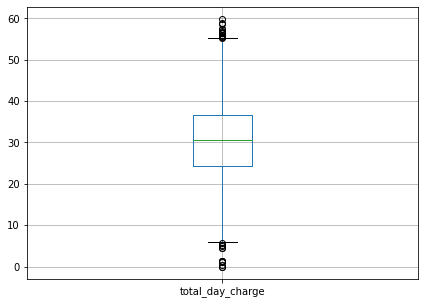

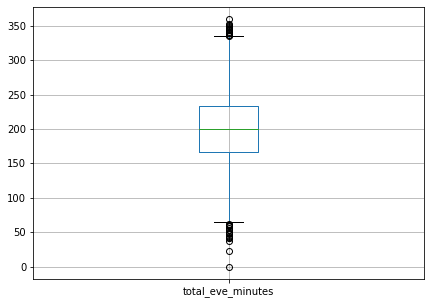

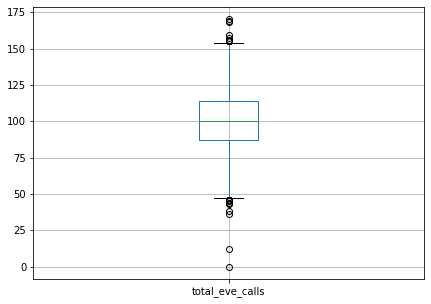

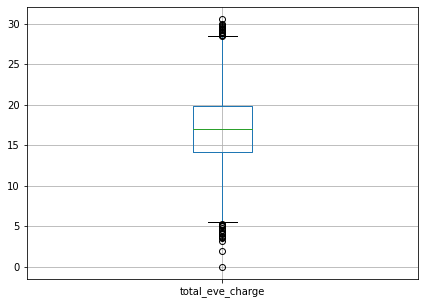

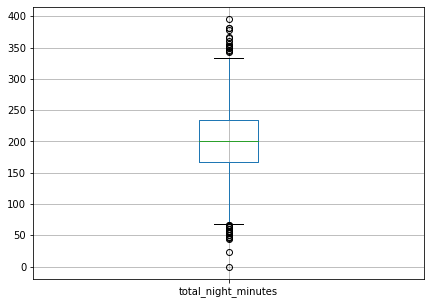

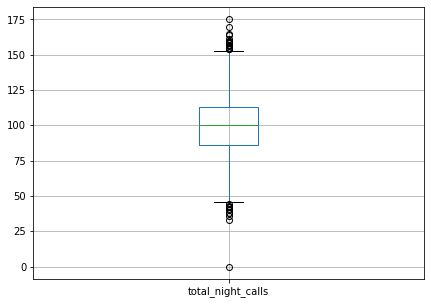

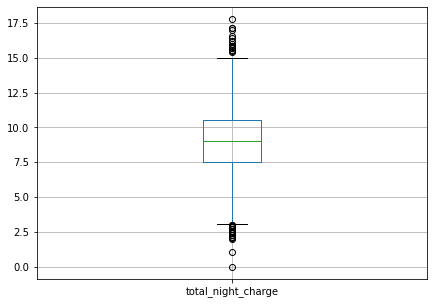

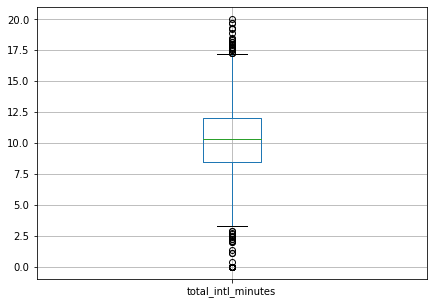

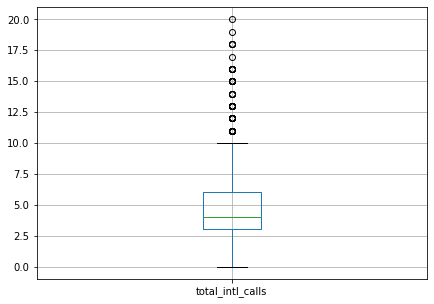

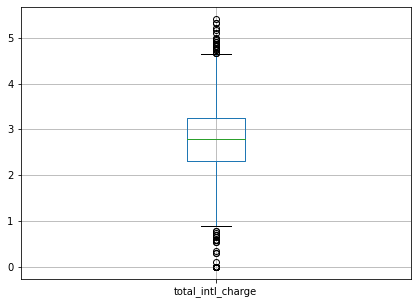

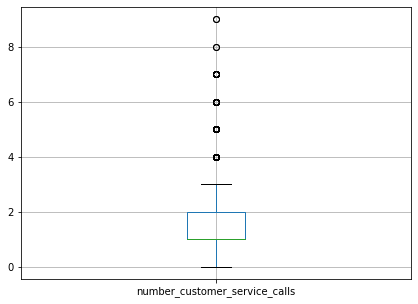

In [ ]:
box_df = train[['number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 7, 5
for column in box_df:
    plt.figure()
    box_df.boxplot([column])

## Categorical: Bar plots

### How many Customers are using an international plan 

*   List item
*   List item



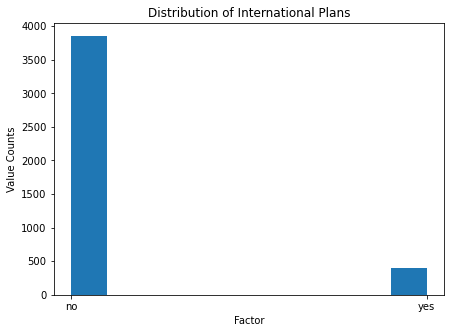

In [ ]:
plt.hist(train['international_plan'])
plt.title("Distribution of International Plans")
plt.ylabel("Value Counts")
plt.xlabel("Factor")
plt.show()

### How many Customers are using voice mail plan

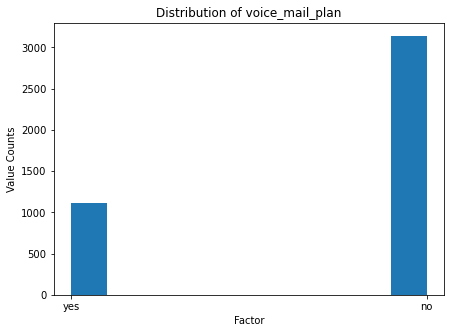

In [ ]:
plt.hist(train['voice_mail_plan'])
plt.title("Distribution of voice_mail_plan")
plt.ylabel("Value Counts")
plt.xlabel("Factor")
plt.show()

### How many Customers will Churn

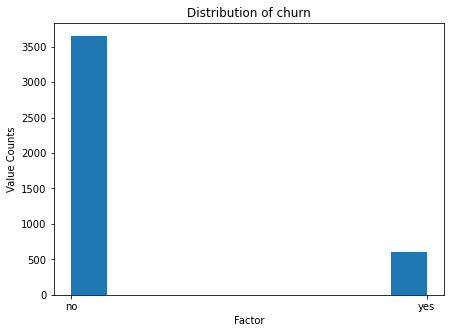

In [ ]:
plt.hist(train['churn'])
plt.title("Distribution of churn")
plt.ylabel("Value Counts")
plt.xlabel("Factor")
plt.show()

## Visualizing and Understanding the Data, including understanding:
## How your data is distributed (numerical & categorical)

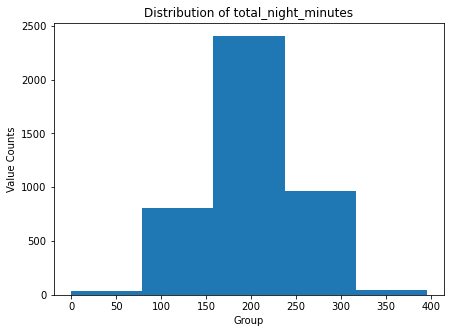

In [ ]:
plt.hist(train['total_night_minutes'], 5)
plt.title("Distribution of total_night_minutes")
plt.ylabel("Value Counts")
plt.xlabel("Group")
plt.show()

## How the columns are related? (correlations or other relationships)

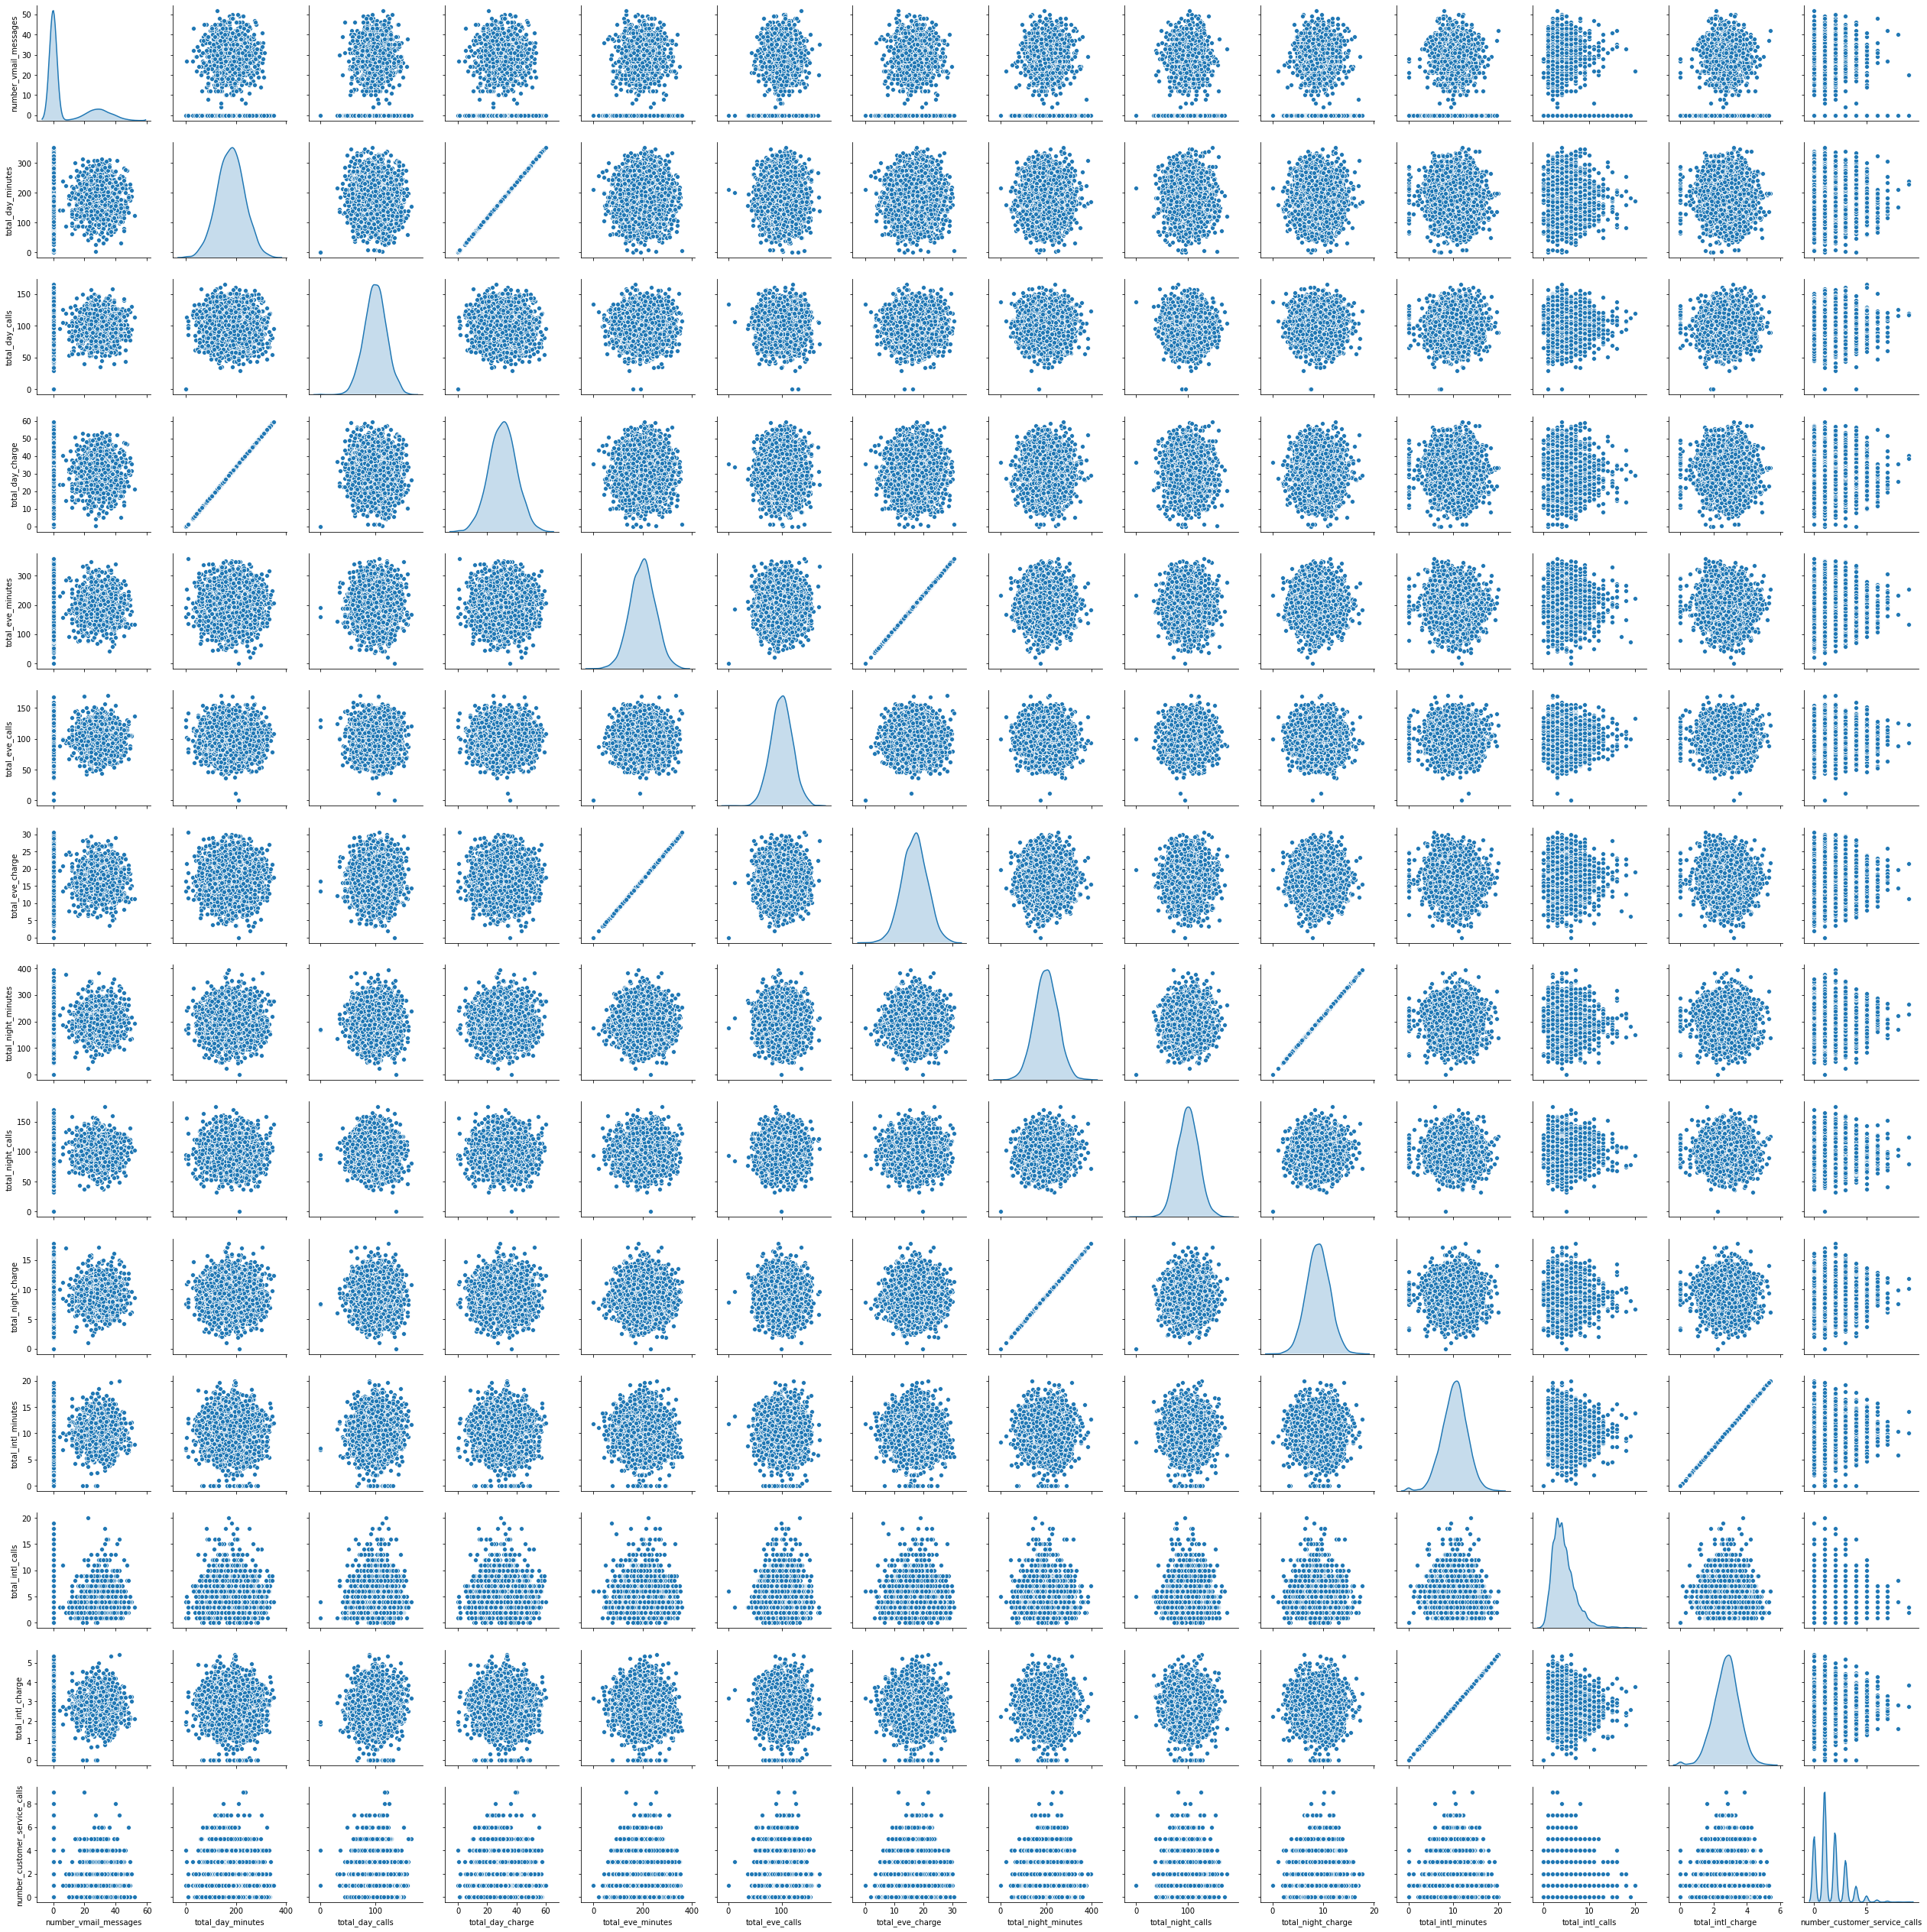

In [ ]:
import seaborn as sns
sns.pairplot(train[['international_plan',
       'voice_mail_plan','number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn']], diag_kind='kde')

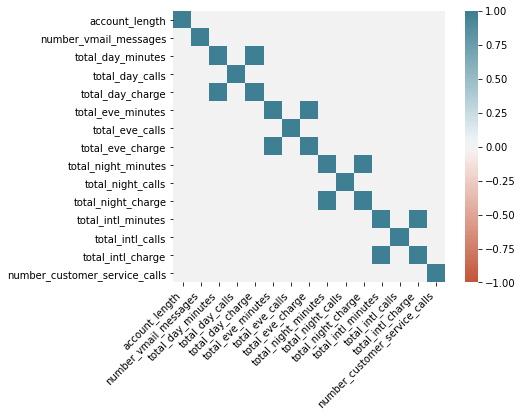

In [ ]:


corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

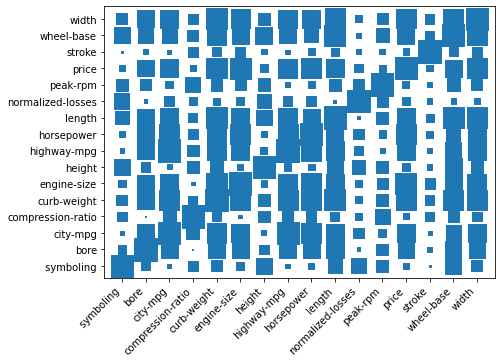

In [ ]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')
#columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'city-mpg', 'price'] 
corr = data.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

## The above three plots are showing the correaltion between all parameters of the dataset

## If there are any outliers... (note them but don't remove them yet!)

In [ ]:
train.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

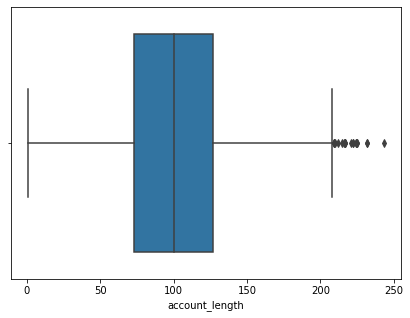

In [ ]:
sns.boxplot(x=train['account_length'])

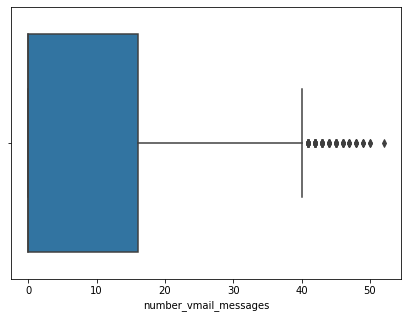

In [ ]:
sns.boxplot(x=train['number_vmail_messages'])

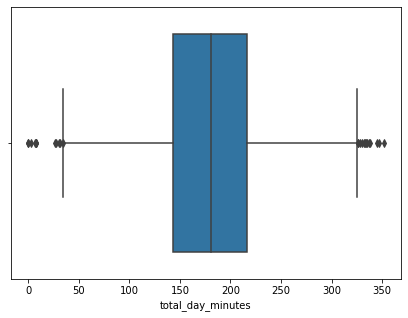

In [ ]:
sns.boxplot(x=train['total_day_minutes'])

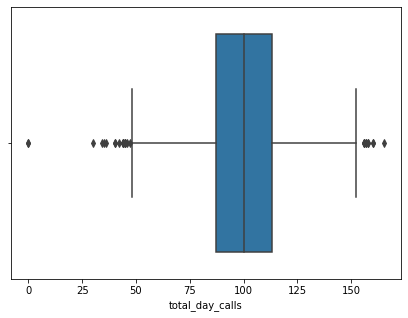

In [ ]:
sns.boxplot(x=train['total_day_calls'])

## From the above box plots it can be clearly seen that there are outliers in the dataset and the dataset is not evenly distributed 

## The need for doing any relevant statistical tests (e.g., T-tests)

## ANOVA TEST IS DONE IN NEXT STEP

## Assessing Missing Values (but don't fill/impute them yet!)

### There is no missing value in the Dataset

<br>
<br> <font size="6" color=Blue>Surprises</font> <br/>
<br>

<br>
<br> <font size="6" color=Blue>Next Steps</font> <br/>
<br>

## Dealing with Missing Data;




### There is no missing data in our dataset

## Transforming Data

## * Numerical:

### ** Normalize

In [1]:
numeric = train[['number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(numeric)
# transform training data
normal_numeric_data = norm.transform(numeric)
cols = numeric.columns.values
# normalized data to dataframe
normal_numeric_data = pd.DataFrame(data = normal_numeric_data, columns = cols)
normal_numeric_data.head(5)

NameError: ignored

## *Categorical:

### ** Label encoder (ordinal)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Categorical = train[['international_plan','voice_mail_plan','churn']]
Categorical = Categorical.apply(LabelEncoder().fit_transform)
Categorical.head(5)

international_plan  voice_mail_plan  churn
0                   0                1      0
1                   0                0      0
2                   1                0      0
3                   1                0      0
4                   0                1      0

## Feature Engineering (what columns/features can you make to add value & information to your data?) and Feature Selection like:

## *Numerical:

### **  Correlation ANOVA

We have already encoded the categorical Columns, so now we are just going to do the Numeric Feature Selection using ANOVA

In [ ]:
import warnings
warnings.filterwarnings('ignore')
total_data = numeric
total_data['international_plan'] = Categorical.international_plan
total_data['voice_mail_plan'] = Categorical.voice_mail_plan
total_data['churn'] = Categorical.churn
total_data.head(5)

number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls  international_plan  voice_mail_plan  churn  
0                              1                   0                1      0  
1                              0                   0                0      0  
2                              2                   1                0      0  
3                              3                   1                0      0  
4                              3                   0                1      0

Feature 0: 30.133387
Feature 1: 153.101652
Feature 2: 0.031118
Feature 3: 153.084723
Feature 4: 23.800096
Feature 5: 0.366393
Feature 6: 23.797432
Feature 7: 14.032573
Feature 8: 0.003956
Feature 9: 14.027386
Feature 10: 7.758674
Feature 11: 5.858407
Feature 12: 7.754311
Feature 13: 140.831230
Feature 14: 198.016516
Feature 15: 40.598683


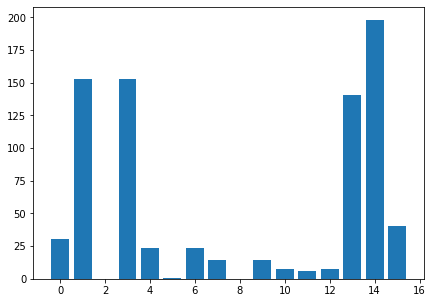

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
# load the dataset
l = len(total_data.columns.values)
l = l - 1
X = total_data.iloc[:,0:l]
y = total_data.churn
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Selecting Final Features that will be used in the Machine Learning

In [ ]:
score = []
score = fs.scores_
selected_feature = []
i = 0
while i<len(score):
    if score[i] > 15:
        selected_feature.append(i)
    i = i+1
print("These Feature Has been Selected: ",selected_feature)
print()
print("Getting indexes the Actual Data Columns:")
print()
i = 0
while i<len(total_data.columns):
    print("Index: ",i," ",total_data.columns[i])
    i = i+1
final_selected_df = pd.DataFrame()
final_selected_df['number_vmail_messages'] = total_data['number_vmail_messages']
final_selected_df['total_day_minutes'] = total_data['total_day_minutes']
final_selected_df['total_day_charge'] = total_data['total_day_charge']
final_selected_df['total_eve_minutes'] = total_data['total_eve_minutes']
final_selected_df['total_eve_charge'] = total_data['total_eve_charge']
final_selected_df['number_customer_service_calls'] = total_data['number_customer_service_calls']
final_selected_df['international_plan'] = total_data['international_plan']
final_selected_df['voice_mail_plan'] = total_data['voice_mail_plan']
final_selected_df['churn'] = total_data['churn']
final_selected_df.head(5)

These Feature Has been Selected:  [0, 1, 3, 4, 6, 13, 14, 15]

Getting indexes the Actual Data Columns:

Index:  0   number_vmail_messages
Index:  1   total_day_minutes
Index:  2   total_day_calls
Index:  3   total_day_charge
Index:  4   total_eve_minutes
Index:  5   total_eve_calls
Index:  6   total_eve_charge
Index:  7   total_night_minutes
Index:  8   total_night_calls
Index:  9   total_night_charge
Index:  10   total_intl_minutes
Index:  11   total_intl_calls
Index:  12   total_intl_charge
Index:  13   number_customer_service_calls
Index:  14   international_plan
Index:  15   voice_mail_plan
Index:  16   churn


number_vmail_messages  total_day_minutes  total_day_charge  \
0                     26              161.6             27.47   
1                      0              243.4             41.38   
2                      0              299.4             50.90   
3                      0              166.7             28.34   
4                     24              218.2             37.09   

   total_eve_minutes  total_eve_charge  number_customer_service_calls  \
0              195.5             16.62                              1   
1              121.2             10.30                              0   
2               61.9              5.26                              2   
3              148.3             12.61                              3   
4              348.5             29.62                              3   

   international_plan  voice_mail_plan  churn  
0                   0                1      0  
1                   0                0      0  
2                   1                0      0  
3                   1                0      0  
4                   0                1      0

### Writing Final Data for Milestone 3

In [ ]:
final_selected_df.to_csv("final_selected_df.csv",index = False)

<br>
<br> <center> <font size="7" color=Orange>Milestone 3: Machine Learning</font> </center> <br/>

# Since it's a Classification Problem
# The following  Classification algorithms are used
- Support Vector Machine
- Decision Tree Classification 
- Ridge Classification 
- SGD Classification
- KNEIGHBORSCLASSIFIER 
- Rabdom Forest Classification 
- Logistic Regression

## The classification reports, training, and testing accuracy for each algorithm is drawn
## Testing accuracy is used to compare each algorithm

# Libraries and Dataset Reading

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
print("Reading the Dataset")
churn_data = pd.read_csv('final_selected_df.csv')
print()
print("Shape of Dataset is: ",churn_data.shape)

Reading the Dataset

Shape of Dataset is:  (4250, 9)


In [ ]:
churn_data.columns

Index(['number_vmail_messages', 'total_day_minutes', 'total_day_charge',
       'total_eve_minutes', 'total_eve_charge',
       'number_customer_service_calls', 'international_plan',
       'voice_mail_plan', 'churn'],
      dtype='object')

# Checking for Null Values

In [ ]:
print("Null values per column are:")
print(churn_data.isnull().sum(axis = 0))
print("Filling out the Null values")
print("Spliting the Data into Input and output for the Model")

Null values per column are:
number_vmail_messages            0
total_day_minutes                0
total_day_charge                 0
total_eve_minutes                0
total_eve_charge                 0
number_customer_service_calls    0
international_plan               0
voice_mail_plan                  0
churn                            0
dtype: int64
Filling out the Null values
Spliting the Data into Input and output for the Model


# Train Test Splitting the dataset

In [ ]:
X=churn_data.loc[:, churn_data.columns != 'churn']

In [ ]:
y=churn_data['churn']

# Support Vector Machine

### A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

A support vector machine model to predict whether a customer churn or not
	Model			Train Acc	Test Acc
Support Vector Machine		   87 % 	   86 % 	  


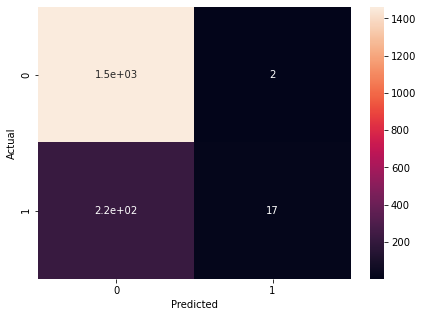

Confusion Matrix: SVM 
[[1461    2]
 [ 220   17]]
Classification Report:SVM 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1463
           1       0.89      0.07      0.13       237

    accuracy                           0.87      1700
   macro avg       0.88      0.54      0.53      1700
weighted avg       0.87      0.87      0.82      1700

('Support Vector Machine Classifier Accuracy:', 86.94117647058823)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print("A support vector machine model to predict whether a customer churn or not")
clf = SVC()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Support Vector Machine\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: SVM "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:SVM "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Support Vector Machine Classifier Accuracy:" ,LR_accuracy*100))
Accuracy_SVM=LR_accuracy*100

# Logistic Regression

## Logistic Regression:
### Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.
### It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.
    

A Logistic Regression model to predict whether a customer churn or not
	Model			Train Acc	Test Acc
Logistic Regression		   86 % 	   86 % 	  


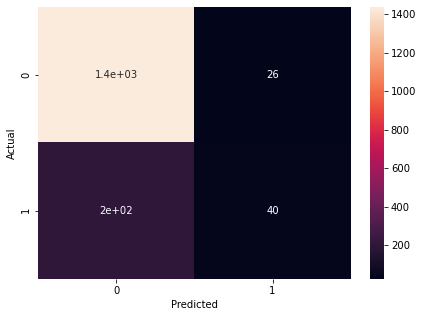

Confusion Matrix: Logistic Regression 
[[1437   26]
 [ 197   40]]
Classification Report:Logistic Regression 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1463
           1       0.61      0.17      0.26       237

    accuracy                           0.87      1700
   macro avg       0.74      0.58      0.60      1700
weighted avg       0.84      0.87      0.84      1700

('Logistic Regression Classifier Accuracy:', 86.88235294117646)


In [ ]:
print("A Logistic Regression model to predict whether a customer will churn or not")
clf = LogisticRegression()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Logistic Regression\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: Logistic Regression "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Logistic Regression "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Logistic Regression Classifier Accuracy:" ,LR_accuracy*100))
Accuracy_Logistic=LR_accuracy*100

# Decision Tree Classifier 

### Decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and classification problems. Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree. We can represent any boolean function on discrete attributes using the decision tree.

A Decision Tree Classifier model to predict whether a customer churn or not
	Model			Train Acc	Test Acc
Decision Tree Classifier		   100 % 	   89 % 	  


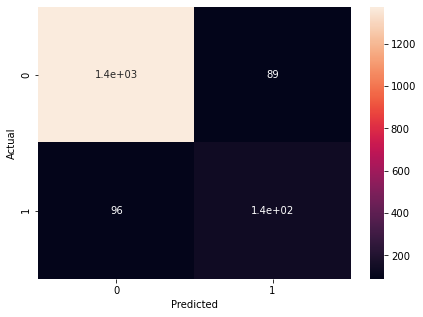

Confusion Matrix: Decision Tree Classifier 
[[1374   89]
 [  96  141]]
Classification Report:Decision Tree Classifier 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1463
           1       0.61      0.59      0.60       237

    accuracy                           0.89      1700
   macro avg       0.77      0.77      0.77      1700
weighted avg       0.89      0.89      0.89      1700

('Decision Tree Classifier Accuracy:', 89.11764705882354)


In [ ]:
print("A Decision Tree Classifier model to predict whether a customer will churn or not")
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Decision Tree Classifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: Decision Tree Classifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Decision Tree Classifier "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Decision Tree Classifier Accuracy:" ,LR_accuracy*100))
Accuracy_Decision=LR_accuracy*100

# Random Forest Classification

### Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

A Random Forest Classifier model to predict whether a customer churn or not
	Model			Train Acc	Test Acc
Random Forest Classifier 		   100 % 	   93 % 	  


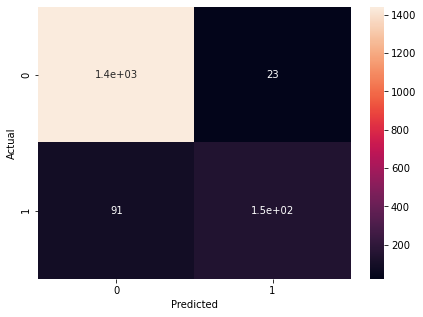

Confusion Matrix: Random Forest Classifier 
[[1440   23]
 [  91  146]]
Classification Report:Random Forest Classifier 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1463
           1       0.86      0.62      0.72       237

    accuracy                           0.93      1700
   macro avg       0.90      0.80      0.84      1700
weighted avg       0.93      0.93      0.93      1700

('Random Forest Classifier Accuracy:', 93.29411764705883)


In [ ]:
print("A Random Forest Classifier model to predict whether a customer will churn or not")
clf = RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Random Forest Classifier \t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: Random Forest Classifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Random Forest Classifier "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Random Forest Classifier Accuracy:" ,LR_accuracy*100))
Accuracy_Random=LR_accuracy*100

# Ridge Classification 

## Ridge Regression tends to a portion of the issues of Ordinary Least Squares by forcing a punishment on the size of the coefficients. The edge coefficients limit a punished remaining amount of squares 
## The multifaceted nature boundary controls the measure of shrinkage: the bigger the estimation of, the more noteworthy the measure of shrinkage and hence the coefficients become stronger to collinearity. Likewise, with other direct models, Ridge will take in its fit strategy exhibits X, y and will store the coefficients of the straight model in its coef_ part. This strategy has similar request of unpredictability as Ordinary Least Squares. 
## It will be used as classification here with binary lables


A RidgeClassifier model to predict whether a customer churn or not
	Model			Train Acc	Test Acc
RidgeClassifier		   86 % 	   86 % 	  


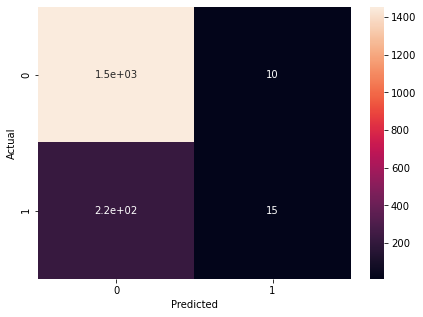

Confusion Matrix: RidgeClassifier 
[[1453   10]
 [ 222   15]]
Classification Report:RidgeClassifier
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1463
           1       0.60      0.06      0.11       237

    accuracy                           0.86      1700
   macro avg       0.73      0.53      0.52      1700
weighted avg       0.83      0.86      0.81      1700

('RidgeClassifier Accuracy:', 86.3529411764706)


In [ ]:
from sklearn.linear_model import RidgeClassifier
print("A RidgeClassifier model to predict whether a customer will churn or not")
clf = RidgeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("RidgeClassifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: RidgeClassifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:RidgeClassifier"))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("RidgeClassifier Accuracy:" ,LR_accuracy*100))
Accuracy_RidgeClassifier=LR_accuracy*100

# SGD Classification

## Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in high-dimensional optimization problems this reduces the computational burden, achieving faster iterations in trade for a lower convergence rate

A SGDClassifier model to predict whether a customer churn or not
	Model			Train Acc	Test Acc
SGDClassifier		   86 % 	   86 % 	  


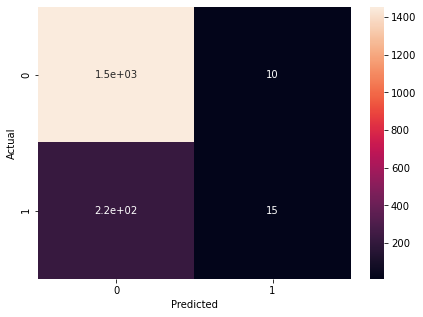

Confusion Matrix: SGDClassifier 
[[1453   10]
 [ 222   15]]
Classification Report:SGDClassifier
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1463
           1       0.60      0.06      0.11       237

    accuracy                           0.86      1700
   macro avg       0.73      0.53      0.52      1700
weighted avg       0.83      0.86      0.81      1700

('SGDClassifier Accuracy:', 86.3529411764706)


In [ ]:
from sklearn.linear_model import SGDClassifier
print("A SGDClassifier model to predict whether a customer will churn or not")
clf = RidgeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("SGDClassifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: SGDClassifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:SGDClassifier"))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("SGDClassifier Accuracy:" ,LR_accuracy*100))
Accuracy_SGDClassifier=LR_accuracy*100


# K Neighbour Classification 

### K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN used in the variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. In political science, classifying potential voters in two classes will vote or won’t vote. KNN algorithm used for both classification and regression problems. KNN algorithm based on feature similarity approach.

A KNeighborsClassifier model to predict whether a customer churn or not
	Model			Train Acc	Test Acc
KNeighborsClassifier		   86 % 	   86 % 	  


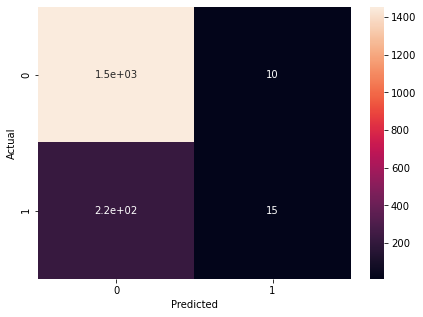

Confusion Matrix: KNeighborsClassifier 
[[1453   10]
 [ 222   15]]
Classification Report:KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1463
           1       0.60      0.06      0.11       237

    accuracy                           0.86      1700
   macro avg       0.73      0.53      0.52      1700
weighted avg       0.83      0.86      0.81      1700

('KNeighborsClassifier Accuracy:', 86.3529411764706)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
print("A KNeighborsClassifier model to predict whether a customer will churn or not")
clf = RidgeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("KNeighborsClassifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: KNeighborsClassifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:KNeighborsClassifier"))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("KNeighborsClassifier Accuracy:" ,LR_accuracy*100))
Accuracy_KNeighborsClassifier=LR_accuracy*100


## Accuracy Measures techniques used
- Mainly 4 techqniques are used
#### Precision 
##### Precision talks about how precise/accurate our model is out of those predicted positive, how many of them are actual positive. Precision is a good measure to determine, when the costs of False Positive is high.
#### Recall
##### Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.
#### F1- Score
##### F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).
#### Accuracy 
#####  Accuracy shows the combined effect of the precision and recall when both factors are important 

###### Since it is important to know which factors will affect customer churn and what factors do not, we focused on combined accuracy for the final purpose

# Combined Accuracy for each Algorithm

In [ ]:
AA=pd.DataFrame()
AA['Algorithm']=[ 'SVM','Random Forest Classifier','Logistic Regression','Decision Tree Classifier','Ridge Classifier','SGD Classifier'
                ,'KNeighborsClassifier ']

In [ ]:
AA['Accuracy (%)']=[Accuracy_SVM , Accuracy_Random,Accuracy_Logistic, Accuracy_Decision,Accuracy_RidgeClassifier
                   ,Accuracy_SGDClassifier,Accuracy_KNeighborsClassifier]

In [ ]:
AA=AA.sort_values(['Accuracy (%)'])

In [ ]:
AA

Algorithm  Accuracy (%)
4          Ridge Classifier     86.352941
5            SGD Classifier     86.352941
6     KNeighborsClassifier      86.352941
2       Logistic Regression     86.882353
0                       SVM     86.941176
3  Decision Tree Classifier     89.117647
1  Random Forest Classifier     93.294118

In [ ]:
import plotly.express as px

In [ ]:
fig = px.bar(AA, x='Algorithm', y='Accuracy (%)',title="Accuracy of each Classifier for Churn Predictions",color='Accuracy (%)')
fig.show()

# Random Forest Classification is providing the best accuracy with a score 93%

## To answer our question...
## From our approach it can be seen that companies can predict, with up-to 93% accuracy, wether customers will churn or not
## The main features that are to focused are 'number_vmail_messages', 'total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge','number_customer_service_calls', 'international_plan', 'voice_mail_plan'

# Conclusion
### For a company to be profitable I believe that they should focus on 80 20 rules. From our prediction results and feature selections we can conclude that only eight variables 'number_vmail_messages', 'total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge','number_customer_service_calls', 'international_plan', 'voice_mail_plan' are enough to predict whether the customer will churn or not. If they use the random forest algorithm it can be said with 93% accuracy that the customer will churn depending upon these five variables. Companies need to focus on these eight features to determine what can be done to improve within these areas to retain customers.  Since this model is 93% accurate, it can be said that it is vital that these five variables should never be neglected.

## Further work
#### Further we can tune the parameters of each algorithm to achieve the greatest accuracy
#### A disadvantage to this is the time it takes to select the best parameters

# Code for Parameter Tuning SVM Classifier 

In [ ]:
print("Improving Model using Grid Search")
print()
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:

    print()
    print("Working with",tuned_parameters)
    clf = GridSearchCV(SVC(), tuned_parameters, scoring='%s_macro' % score)
    clf.fit(X_train, y_train.values.ravel())

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
